<a href="https://colab.research.google.com/github/jesandovala/Heroes_Classification/blob/master/Heroes_Classificator_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Heroes Classification

## Authentication

In [0]:
import os.path
import numpy as np
import pandas as pd
import PIL
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

!pip install -U -q PyDrive ## you will have install for every colab session

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Using TensorFlow backend.


    100% |████████████████████████████████| 993kB 17.9MB/s 


## Load File in Zip 

In [0]:
file_id = '1s_IAougk7g8yzhJQh30jv1pxcj9vUH4z'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])

In [0]:
!ls

adc.json  IMAYIN.zip  sample_data


In [0]:
!unzip IMAYIN.zip > /dev/null

In [0]:
!ls -la

total 43312
drwxr-xr-x 1 root root     4096 Mar 18 23:56 .
drwxr-xr-x 1 root root     4096 Mar 18 23:55 ..
-rw-r--r-- 1 root root     2501 Mar 18 23:56 adc.json
drwxr-xr-x 1 root root     4096 Mar 18 23:56 .config
drwxr-xr-x 4 root root     4096 Mar 18 23:56 Dataset
-rw-r--r-- 1 root root 44314800 Mar 18 23:56 IMAYIN.zip
drwxr-xr-x 1 root root     4096 Mar  8 17:26 sample_data


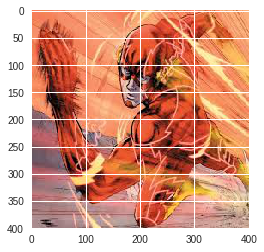

In [0]:
%matplotlib inline


img = load_img('Dataset/DC_COMICS/Flash/1.jpg',target_size=(400,400),interpolation='nearest')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
plt.imshow(x/255)

In [0]:
!rm 'IMAYIN.zip'

Count files in folder

In [0]:
df = pd.DataFrame({'Universe':[],'Folders':[],'Count':[]})
path = 'Dataset/'
universe = os.listdir(path) 

for j in universe[:]:
  folders = os.listdir(path+j+'/')
  for i in folders[:]:
    df =df.append({'Universe':j,'Folders':i,'Count':len([item for item in os.listdir(path+j+'/'+i) if os.path.isfile(os.path.join(path+j+'/'+i, item))])}, ignore_index=True)

df

,Count,Folders,Universe
0,3.0,Fantastic Four,Marvel
1,3.0,DareDevil,Marvel
2,2.0,Hulk,Marvel
3,118.0,Wolverine,Marvel
4,119.0,Captain Amerik,Marvel
5,1.0,Captain Marvel,Marvel
6,140.0,IronMan,Marvel
7,127.0,Thor,Marvel
8,8.0,Avengers,Marvel
9,7.0,SpiderMan,Marvel


In [0]:
path = 'Dataset/' 
universe = os.listdir(path)
hero= []
folders=[]
#def main():
def rename(): 
  for j in universe:
    hero = os.listdir(path+j+"/")
    for k in hero:
      folders= os.listdir(path+j+"/"+k+"/")
      i = 0
      for filename in folders: 
        file =k+str(i) + ".jpg"
        src =path+j+'/'+k+'/'+filename 
        dst =path+j+'/'+k+'/'+ file

        os.rename(src, dst) 
        i += 1
  
# Driver Code 
#if __name__ == '__main__':
if __name__ == '__rename__': 
      
    # Calling main() function 
    #main()
    rename() 

In [0]:
path3 = 'Dataset/Marvel/Thor/' 
folders2= os.listdir(path3)
folders2[:5]

['Thor115.jpg', 'Thor81.jpg', 'Thor83.jpg', 'Thor16.jpg', 'Thor19.jpg']

In [0]:
im = Image.open('Dataset/DC_COMICS/Green Lantern/Green Lantern1.jpg')
im1 = Image.open('Dataset/Marvel/Wolverine/Wolverine1.jpg')
width, height = im.size
width1, height1 = im1.size

print("Green Lantern1: ( width:",width,", height:",height,")")
print("Wolverine1: ( width:",width1,", height:",height1,")")


Green Lantern1: ( width: 266 , height: 190 )
Wolverine1: ( width: 182 , height: 277 )


In [0]:
path = 'Dataset/' 
universe = os.listdir(path)
width: 256
height: 256
hero= []
folders=[]
#def main():
def resize():
  for j in universe:
    hero = os.listdir(path+j+"/")
    for k in hero:
      folders= os.listdir(path+j+"/"+k+"/")
      for filename in folders:
        img= Image.open(path+j+"/"+k+"/"+filename)
        img = img.resize((int(width),int(height)),Image.ANTIALIAS)
        img.save(path+j+"/"+k+"/"+filename,quality=90)
resize()

OSError: ignored

In [0]:
import PIL
from PIL import Image
import os
import sys
def readf():
    try:
        input_dir  = str(sys.argv[1].rstrip('/'))  #path to img source folder
        img_size   = str(sys.argv[2])  #The image size (128, 256,etc)
        output_dir  = str(sys.argv[3].rstrip('/')) #output directory
        print "starting...."
        print "Colecting data from %s " % input_dir
        tclass = [ d for d in os.listdir( input_dir ) ]
        counter = 0
        strdc = ''
        hasil = []
        for x in tclass:
           list_dir =  os.path.join(input_dir, x )
           list_tuj = os.path.join(output_dir+'/', x+'/')
           if not os.path.exists(list_tuj):
                os.makedirs(list_tuj)
           if os.path.exists(list_tuj):
               for d in os.listdir(list_dir):
                   try:
                       img = Image.open(os.path.join(input_dir+'/'+x,d))
                       img = img.resize((int(img_size),int(img_size)),Image.ANTIALIAS)
                       fname,extension = os.path.splitext(d)
                       newfile = fname+extension
                       if extension != ".jpg" :
                           newfile = fname + ".jpg"
                       img.save(os.path.join(output_dir+'/'+x,newfile),"JPEG",quality=90)
                       print "Resizing file : %s - %s " % (x,d)
                   except Exception,e:
                        print "Error resize file : %s - %s " % (x,d)
                        sys.exit(1)
               counter +=1
    except Exception,e:
        print "Error, check Input directory etc : ", e
        sys.exit(1)
readf()